## Display Training Curve

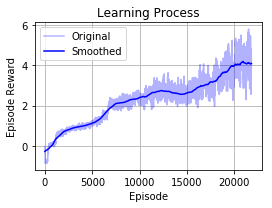

In [2]:
import numpy as np
from matplotlib import pyplot as plt
reward = np.load('reward_log.npy')

def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]
    
# plot smoothed reward curve
plt.figure(figsize=(4,3))
plt.plot(smooth(reward, radius=1), color='b', alpha=0.3, label='Original')
plt.plot(smooth(reward, radius=800), color='b', label='Smoothed')
plt.title('Learning Process')
plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig('training.pdf')
plt.show()
